In this experiment we increase the number of traits per agent to be $K=10$. In the first part we test the effect of adding a similarity threshold with this increased number of traits. Next, we show that when $S=0.5$, $K=10$, that a minority fraction of 10%.

Just realizing I forgot the minority fraction should be set to 0.1 for the second experiment described above, re-running now while I draft the analysis for the first experiment.

In [2]:
dfp5 = pd.read_csv('data/tolerance_diversity/0.5/K=10/part-b474c35f-2cf5-4d22-adbe-6c3902289230.csv')

In [3]:
dfp5.head()

,disliking,homophily,initial_prop_churlish,initial_prop_covert,prop_churlish,prop_covert,timestep,trial_idx
0,0.05,0.0,0.5,0.5,0.50,0.50,0,301244041
1,0.05,0.0,0.5,0.5,0.47,0.48,1,301244041
2,0.05,0.0,0.5,0.5,0.45,0.47,2,301244041
3,0.05,0.0,0.5,0.5,0.44,0.46,3,301244041
4,0.05,0.0,0.5,0.5,0.44,0.46,4,301244041


In [4]:
similarities = np.arange(0.1, 1.01, 0.1)
sim_strs = [f'{s:1.1f}' for s in similarities]
sim_strs

['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

In [41]:
# LOADING ALL AVAILABLE DATA FOR MAIN RESULTS AND SUPPLEMENT
K = 15
path_f = lambda sstr: f'data/tolerance_diversity/{sstr}/K={K}/full.csv'

Ks = [3, 5, 9, 15, 21]
dfs = {K: [] for K in Ks}
for K in Ks:
    
    for sstr in sim_strs:
        dfs[K].append(pd.read_csv(path_f(sstr)))

In [ ]:
from id_signaling.figures import similarity_threshold

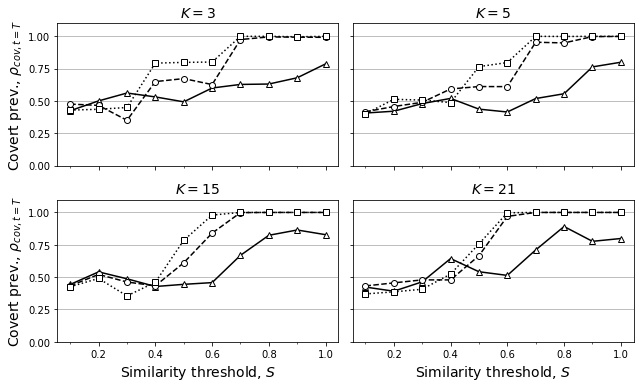

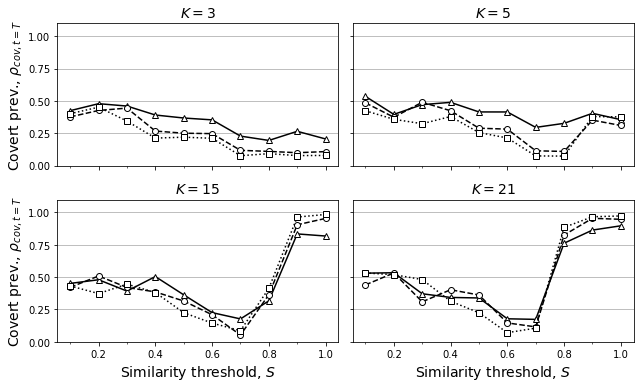

In [60]:
# MAIN RESULTS - I will manually build a 2x2 subplot with a selection
# of dataframes for different K values all with homophily 0.2 to 
# represent representative outcomes at low/moderate homophily 
# (w=0.0 to 0.3).

# Ks = [3, 5, 15, 21]
w = 0.2

def make_plots(w):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5.5), 
                             sharex=True, sharey=True)

    K = 3
    similarity_threshold(dfs[K], homophily=w, ax=axes[0,0], 
                                 legend=False, xlabel=False, ylabel=True, 
                                 ylow=0.0, yhigh=1.1)
    axes[0,0].set_title(f'$K={K}$', size=14)

    K = 5
    similarity_threshold(dfs[K], homophily=w, ax=axes[0,1], 
                                 legend=legend, xlabel=False, ylabel=False, 
                                 ylow=0.0, yhigh=1.1)
    axes[0,1].set_title(f'$K={K}$', size=14)

    K = 15
    similarity_threshold(dfs[K], homophily=w, ax=axes[1,0], 
                                 legend=legend, xlabel=True, ylabel=True, 
                                 ylow=0.0, yhigh=1.1)
    axes[1,0].set_title(f'$K={K}$', size=14)

    K = 21
    similarity_threshold(dfs[K], homophily=w, ax=axes[1,1], 
                                 legend=legend, xlabel=True, ylabel=False, 
                                 ylow=0.0, yhigh=1.1)
    axes[1,1].set_title(f'$K={K}$', size=14)
#     plt.suptitle(f'Homophily $w={w}$', fontsize=16, y=1.02)
#     plt.tight_layout()

make_plots(0.2)
plt.savefig('paper/Figures/similarity/similarity_low_medium_S_homophily.pdf')

make_plots(0.5)
plt.savefig('paper/Figures/similarity/similarity_high_S_homophily.pdf')

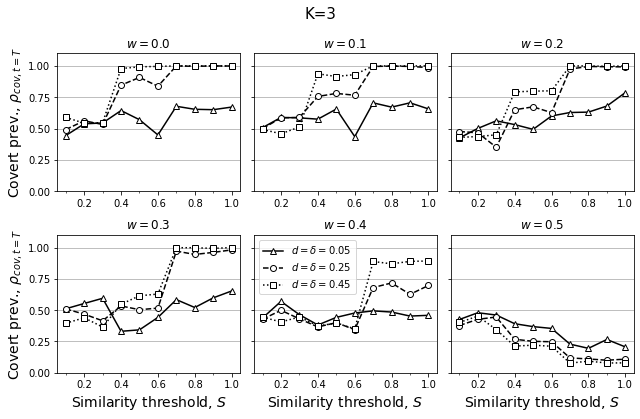

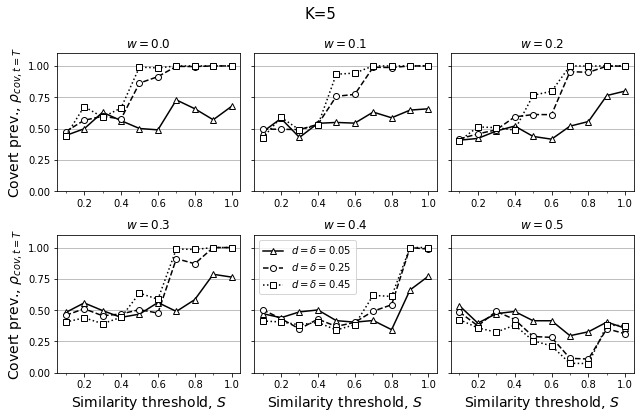

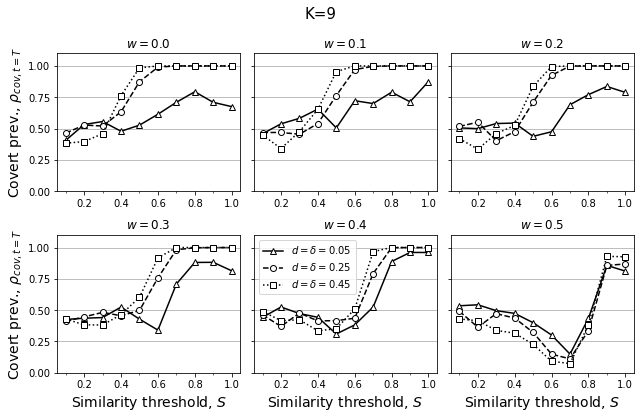

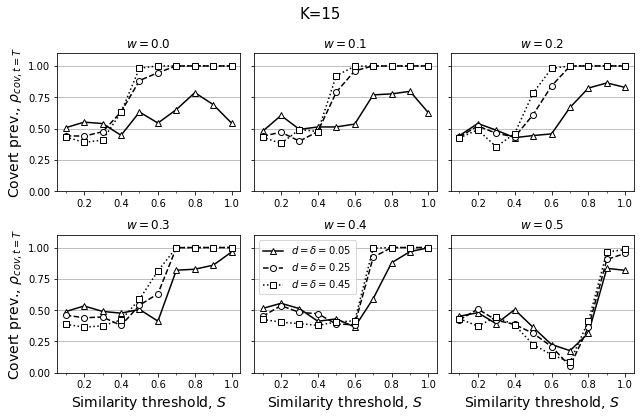

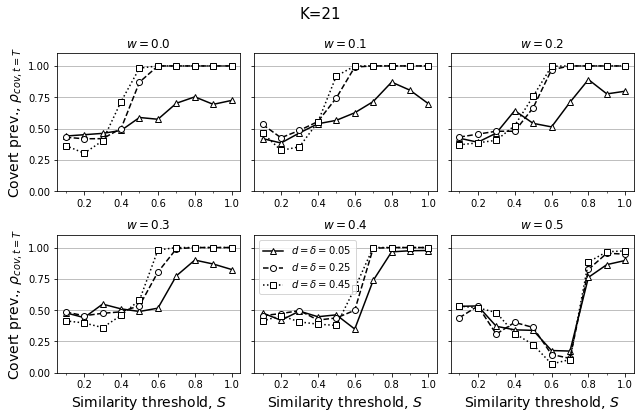

In [40]:
## SUPPLEMENT RESULTS

for K in Ks:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5.5), 
                         sharex=False,sharey=True)
    axes = axes.flatten()
    for idx, h in enumerate(np.arange(0, 0.6, 0.1)):
        if idx == 4:
            legend = True
        else:
            legend = False
        if idx not in [0, 3]:
            ylabel = False
        else:
            ylabel = True
        if idx < 3:
            xlabel = False
        else:
            xlabel = True

        similarity_threshold(dfs[K], homophily=h, ax=axes[idx], 
                             legend=legend, xlabel=xlabel, ylabel=ylabel, ylow=0.0, yhigh=1.1)
        
        plt.suptitle(f"K={K}", y=1.05, fontsize=15)
    plt.savefig(f'paper/Figures/similarity_threshold_matrix_K={K}.pdf')

Above we show all the results we have using the generic `similarity_threshold` function. This is not optimal, since for K<10 there are at least one pair of redundant $S$ values. For $K=9$, e.g., $S=0.9$ is equivalent to $S=1.0$, representing the case where agents must have all 